In [1]:
import dill
import numpy as np
import matplotlib.pyplot as plt
import math, statistics
import pandas as pd

In [41]:
results = dill.load(open('results5x5faces.p', 'rb'))

In [42]:
perceptron = []
p_std = []
nb = []
nb_std = []
svc = []
svc_std = []
for key in results.keys():
    # print(results[key])
    perceptron.append(statistics.mean(results[key]['Perceptron']))
    p_std.append(statistics.stdev(results[key]['Perceptron']))
    nb.append((statistics.mean(results[key]['NaiveBayes'])))
    nb_std.append((statistics.stdev(results[key]['NaiveBayes'])))
    svc.append((statistics.mean(results[key]['SVC'])))
    svc_std.append((statistics.stdev(results[key]['SVC'])))

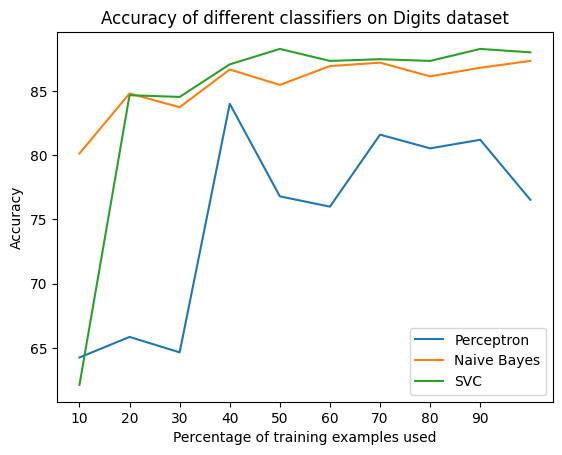

In [43]:
plt.plot(np.arange(10, 110, 10),perceptron, label='Perceptron')
plt.plot(np.arange(10, 110, 10),nb, label='Naive Bayes')
plt.plot(np.arange(10, 110, 10),svc, label='SVC')
plt.xticks(np.arange(10, 100, 10))
plt.legend()
plt.xlabel('Percentage of training examples used')
plt.ylabel('Accuracy')
plt.title('Accuracy of different classifiers on Digits dataset')
plt.show()

In [44]:
np.arange(10, 100, 10)

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

Text(0.5, 1.0, 'Perceptron Algorithm on Digits dataset')

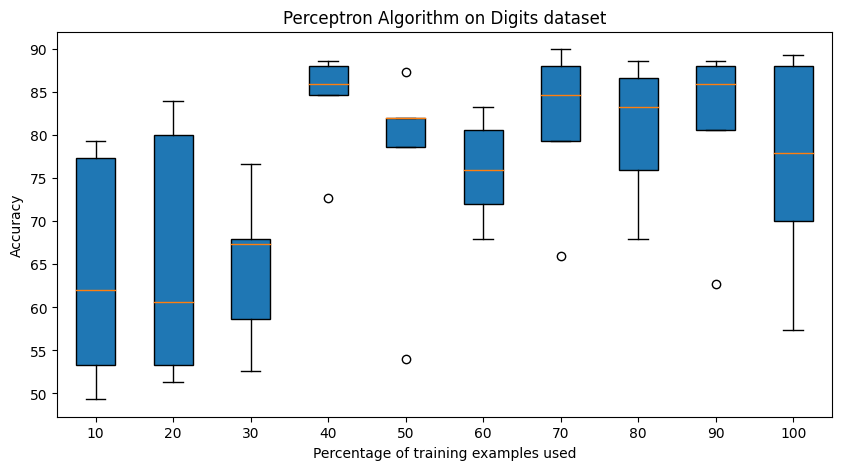

In [45]:
plt.figure(figsize=(10, 5))
for key in results.keys():
    plt.boxplot(results[key]['Perceptron'], positions=[key//10], widths=0.5, patch_artist=True, labels=[key])
plt.xlabel('Percentage of training examples used')
plt.ylabel('Accuracy')
plt.title('Perceptron Algorithm on Digits dataset')


Text(0.5, 1.0, 'Naive Bayes Algorithm on Digits dataset')

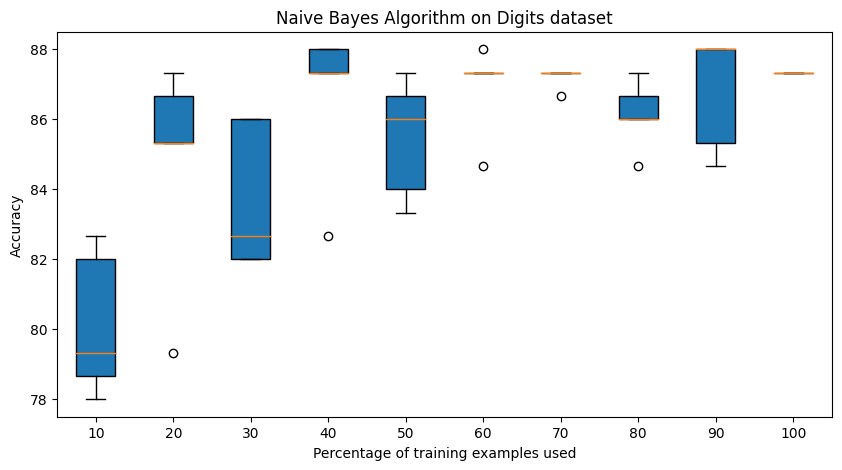

In [46]:
plt.figure(figsize=(10, 5))
for key in results.keys():
    plt.boxplot(results[key]['NaiveBayes'], positions=[key//10], widths=0.5, patch_artist=True, labels=[key])

plt.xlabel('Percentage of training examples used')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Algorithm on Digits dataset')

Text(0.5, 1.0, 'SVC Algorithm on Digits dataset')

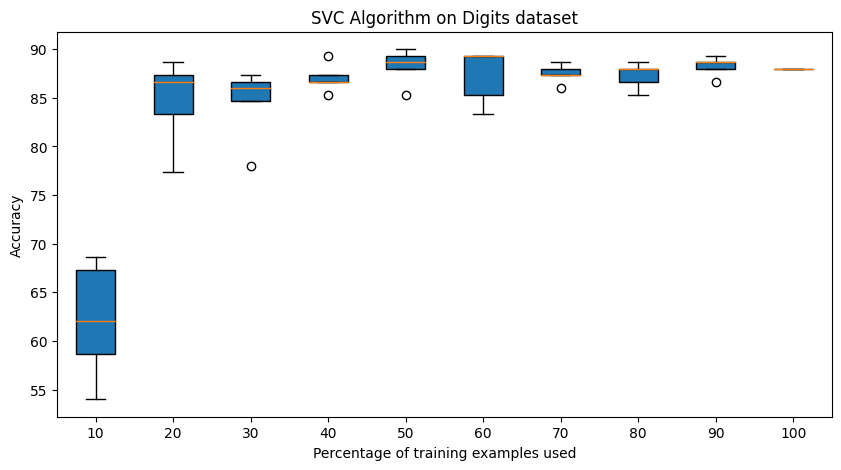

In [47]:
plt.figure(figsize=(10, 5))
for key in results.keys():
    plt.boxplot(results[key]['SVC'], positions=[key//10], widths=0.5, patch_artist=True, labels=[key])

plt.xlabel('Percentage of training examples used')
plt.ylabel('Accuracy')
plt.title('SVC Algorithm on Digits dataset')

In [48]:
algos = ['Perceptron', 'NaiveBayes', 'SVC']
for algo in algos:
    res = {'Mean':[], 'Std Dev':[]}
    for key in results.keys():
        res['Mean'].append(statistics.mean(results[key][algo]))
        res['Std Dev'].append(statistics.stdev(results[key][algo]))
        # print(key, statistics.mean(results[key]['Perceptron']))
    df = pd.DataFrame(res, columns=['Mean', 'Std Dev'])
    df.to_csv(algo+'.csv')